In [33]:
import os
import logging
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

logging.getLogger().setLevel(logging.INFO)

if os.getcwd().endswith("notebooks"):
    os.chdir("..")

from classical.utils.data_loader import preprocess_and_extract_patches, get_image_patches_arrays, reconstruct_from_patches

In [38]:
from classical.autoencoder import Autoencoder
from quantum.trainer import MNIST01QAETrainer, FashionMNISTQAETrainer

trainer = MNIST01QAETrainer(num_trash_qubits=1)
trainer.qae_model.load_model("saved_models/mnist_qae_100_1_trash")

fashion_trainer = FashionMNISTQAETrainer(num_trash_qubits=1)
fashion_trainer.qae_model.load_model("saved_models/f_mnist_qae_100_1_trash")

cae = Autoencoder.load("saved_models/mnist_cae_model")
fashion_cae = Autoencoder.load("saved_models/f_mnist_cae_model")

INFO:root:No sampler provided, using StatevectorSampler by default.
INFO:root:Model loaded successfully. Training history: 300 iterations, Final loss: 0.031406
INFO:root:No sampler provided, using StatevectorSampler by default.
INFO:root:Model loaded successfully. Training history: 300 iterations, Final loss: 0.033135


In [93]:
trainer.qae_model.training_time, fashion_trainer.qae_model.training_time

(96.55469608306885, 96.8575074672699)

In [94]:
cae.training_time, fashion_cae.training_time

(2.98725962638855, 2.8939759731292725)

100%|██████████| 9/9 [00:00<00:00, 290.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

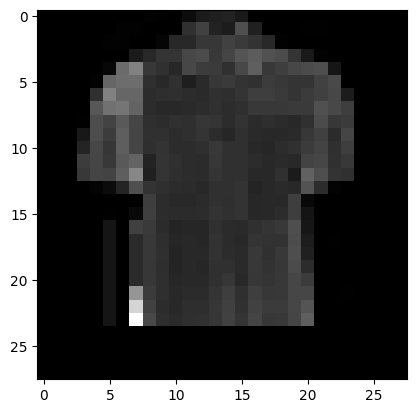

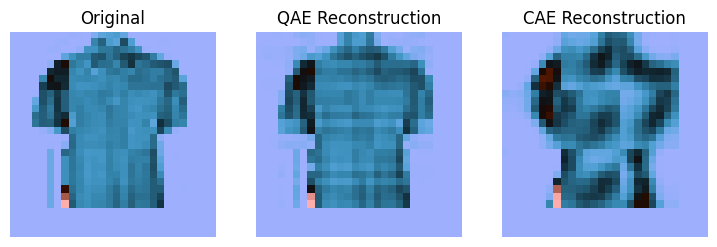

In [78]:
# _, test_set = trainer.get_train_test_sets()
_, test_set = fashion_trainer.get_train_test_sets()
test_patches = get_image_patches_arrays(test_set.skip(5601).take(1), patch_size=8, dropna=False)
test_patches_na_corrected = np.nan_to_num(test_patches)

# drop na values
test_patches_dropped_na = test_patches[~np.isnan(test_patches).any(axis=1)]

originals_image = reconstruct_from_patches(test_patches_na_corrected, image_height=28, image_width=28, patch_size=8)

plt.imshow(originals_image, cmap='gray')

qae_reconstructed_patches = trainer.qae_model.predict(test_patches_dropped_na)
cae_reconstructed_patches = cae.reconstruct(test_patches_dropped_na.reshape(-1, 8, 8, 1))

# add padding back to reconstructed patches
qae_padded_reconstructed_patches = np.zeros_like(test_patches)
qae_padded_reconstructed_patches[~np.isnan(test_patches).any(axis=1)] = qae_reconstructed_patches
cae_padded_reconstructed_patches = np.zeros_like(test_patches)
cae_padded_reconstructed_patches[~np.isnan(test_patches).any(axis=1)] = cae_reconstructed_patches.reshape(-1, 64)

# reconstruct images from patches
reconstructed_image = reconstruct_from_patches(qae_padded_reconstructed_patches, image_height=28, image_width=28, patch_size=8)
cae_reconstructed_image = reconstruct_from_patches(cae_padded_reconstructed_patches, image_height=28, image_width=28, patch_size=8)

# plot results
fig, axes = plt.subplots(1, 3, figsize=(9, 5 * 3.2))

axes[0].imshow(originals_image[..., 0], cmap='berlin')
axes[0].set_title("Original")
axes[0].axis('off')

axes[2].imshow(cae_reconstructed_image[..., 0], cmap='berlin')
axes[2].set_title("CAE Reconstruction")
axes[2].axis('off')

axes[1].imshow(reconstructed_image[..., 0], cmap='berlin')
axes[1].set_title("QAE Reconstruction")
axes[1].axis('off')


0it [00:00, ?it/s]2025-11-23 12:51:40.453881: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
1it [00:00, 16.60it/s]
100%|██████████| 6/6 [00:00<00:00, 291.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

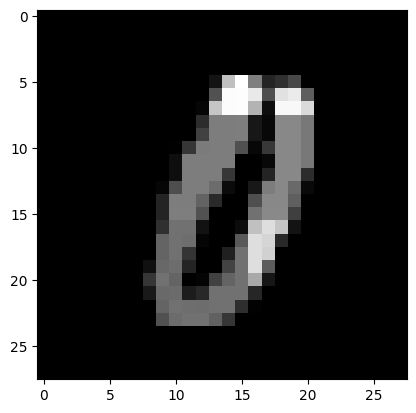

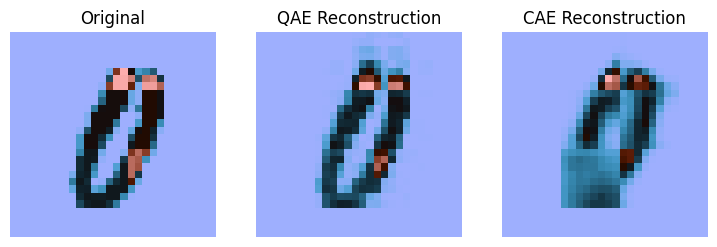

In [91]:
_, test_set = trainer.get_train_test_sets()
# _, test_set = fashion_trainer.get_train_test_sets()
test_patches = get_image_patches_arrays(test_set.skip(1500).take(1), patch_size=8, dropna=False)
test_patches_na_corrected = np.nan_to_num(test_patches)

# drop na values
test_patches_dropped_na = test_patches[~np.isnan(test_patches).any(axis=1)]

originals_image = reconstruct_from_patches(test_patches_na_corrected, image_height=28, image_width=28, patch_size=8)

plt.imshow(originals_image, cmap='gray')

qae_reconstructed_patches = fashion_trainer.qae_model.predict(test_patches_dropped_na)
cae_reconstructed_patches = fashion_cae.reconstruct(test_patches_dropped_na.reshape(-1, 8, 8, 1))

# add padding back to reconstructed patches
qae_padded_reconstructed_patches = np.zeros_like(test_patches)
qae_padded_reconstructed_patches[~np.isnan(test_patches).any(axis=1)] = qae_reconstructed_patches
cae_padded_reconstructed_patches = np.zeros_like(test_patches)
cae_padded_reconstructed_patches[~np.isnan(test_patches).any(axis=1)] = cae_reconstructed_patches.reshape(-1, 64)

# reconstruct images from patches
reconstructed_image = reconstruct_from_patches(qae_padded_reconstructed_patches, image_height=28, image_width=28, patch_size=8)
cae_reconstructed_image = reconstruct_from_patches(cae_padded_reconstructed_patches, image_height=28, image_width=28, patch_size=8)

# plot results
fig, axes = plt.subplots(1, 3, figsize=(9, 5 * 3.2))

axes[0].imshow(originals_image[..., 0], cmap='berlin')
axes[0].set_title("Original")
axes[0].axis('off')

axes[2].imshow(cae_reconstructed_image[..., 0], cmap='berlin')
axes[2].set_title("CAE Reconstruction")
axes[2].axis('off')

axes[1].imshow(reconstructed_image[..., 0], cmap='berlin')
axes[1].set_title("QAE Reconstruction")
axes[1].axis('off')
